In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns

In [221]:
# read in the data
raw_data = pd.read_csv('winequality-red.csv', sep=';')

In [222]:
# remove repeated data
raw_data = raw_data.drop_duplicates()
raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [223]:
# remove outliers
for col in raw_data.columns:
    if col != 'quality':
        iqr = raw_data[col].quantile(0.75) - raw_data[col].quantile(0.25)
        upper_bound = raw_data[col].quantile(0.75) + 3 * iqr
        lower_bound = raw_data[col].quantile(0.25) - 3 * iqr
        raw_data = raw_data[(raw_data[col] < upper_bound) & (raw_data[col] > lower_bound)]

raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1217 non-null   float64
 1   volatile acidity      1217 non-null   float64
 2   citric acid           1217 non-null   float64
 3   residual sugar        1217 non-null   float64
 4   chlorides             1217 non-null   float64
 5   free sulfur dioxide   1217 non-null   float64
 6   total sulfur dioxide  1217 non-null   float64
 7   density               1217 non-null   float64
 8   pH                    1217 non-null   float64
 9   sulphates             1217 non-null   float64
 10  alcohol               1217 non-null   float64
 11  quality               1217 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 123.6 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,8.286360,0.526652,0.262021,2.278554,0.079132,15.759655,45.419474,0.996597,3.317880,0.641561,10.446385,5.631882
std,1.701773,0.180310,0.190105,0.593928,0.016570,9.894299,30.943551,0.001795,0.148797,0.132852,1.067512,0.811656
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.069000,8.000000,22.000000,0.995510,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.078000,14.000000,37.000000,0.996600,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.500000,0.088000,21.000000,60.000000,0.997740,3.410000,0.710000,11.100000,6.000000
max,15.000000,1.330000,0.760000,4.700000,0.147000,57.000000,165.000000,1.002100,3.900000,1.220000,14.000000,8.000000


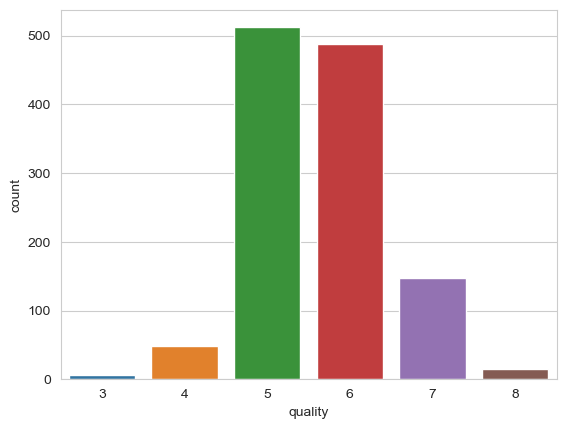

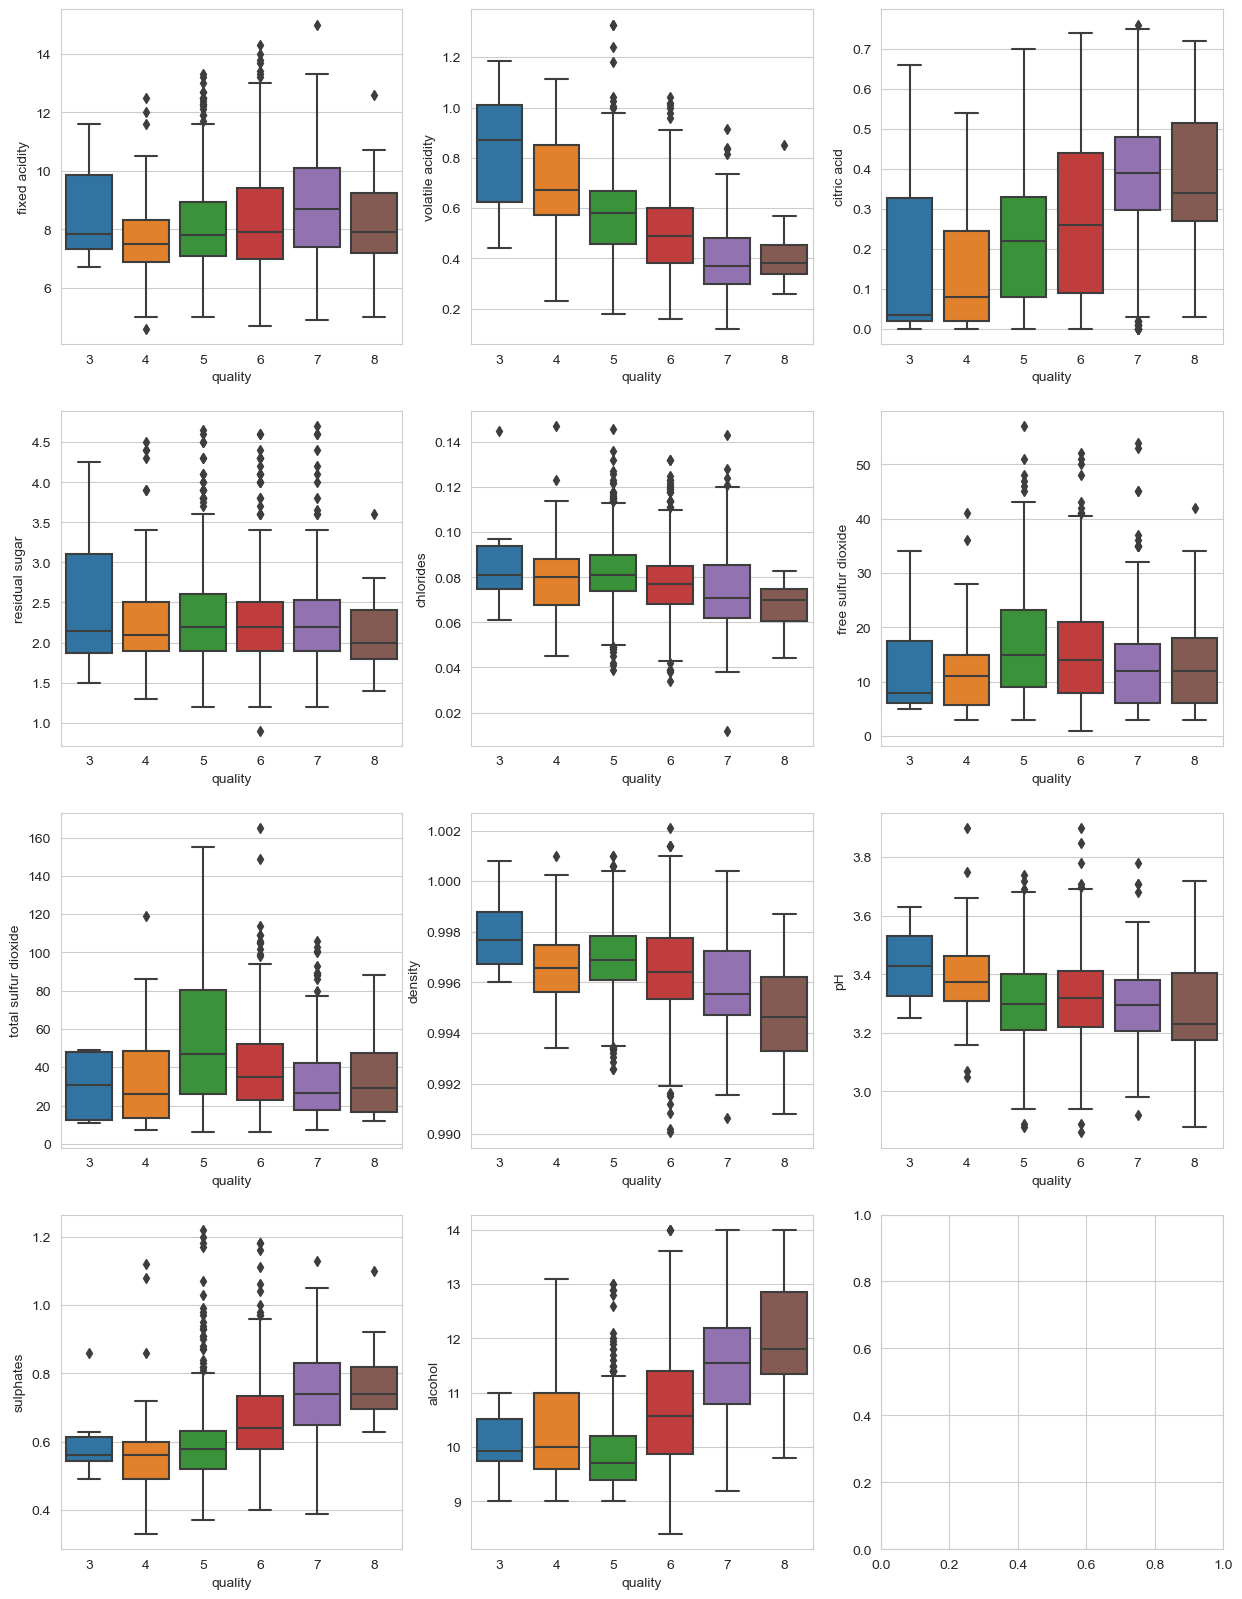

<AxesSubplot: >

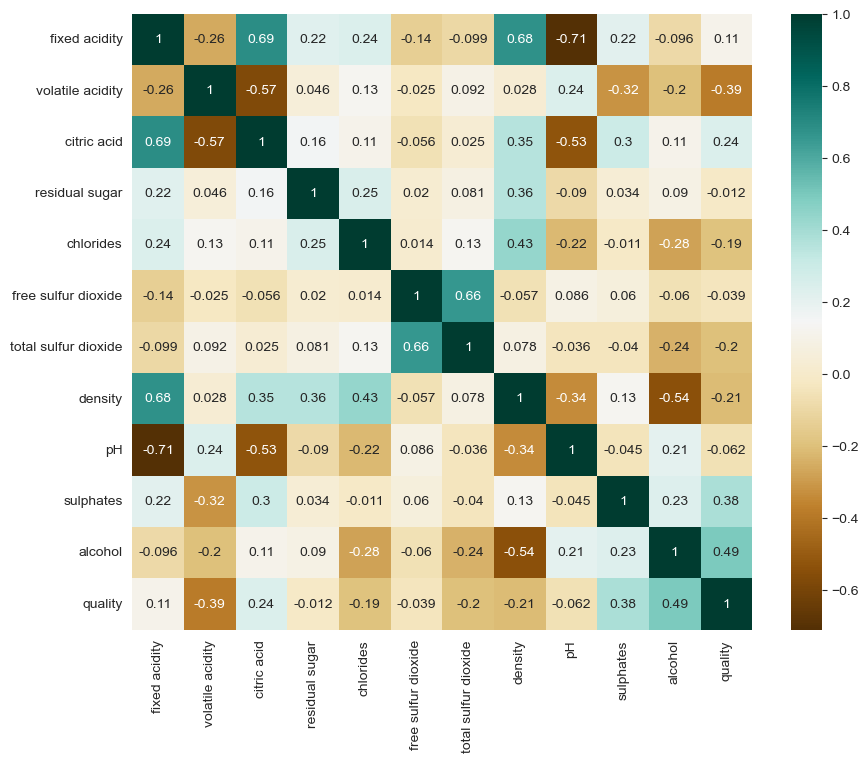

In [224]:
# visualization
sns.countplot(x='quality', data=raw_data)

# box plot for each feature
fig, ax = plt.subplots(4, 3, figsize=(15, 20))
for i, col in enumerate(raw_data.columns):
    if col != 'quality':
        sns.boxplot(x='quality', y=col, data=raw_data, ax=ax[i//3][i%3])

plt.show()
# heatmap correlation matrix
fig = plt.figure(figsize=(10, 8))
corr = raw_data.corr()
sns.heatmap(corr, annot=True, cmap='BrBG')

In [225]:
# normalize features except quality
from sklearn.preprocessing import StandardScaler
input_features = raw_data.drop('quality', axis=1)

scaler = StandardScaler()
input_features = scaler.fit_transform(input_features)

# contact quality to input features
processed_data = np.concatenate((input_features, raw_data['quality'].values.reshape(-1, 1)), axis=1)

In [226]:
# show processed data
processed_data = pd.DataFrame(processed_data, columns=raw_data.columns)
processed_data.info()
processed_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1217 non-null   float64
 1   volatile acidity      1217 non-null   float64
 2   citric acid           1217 non-null   float64
 3   residual sugar        1217 non-null   float64
 4   chlorides             1217 non-null   float64
 5   free sulfur dioxide   1217 non-null   float64
 6   total sulfur dioxide  1217 non-null   float64
 7   density               1217 non-null   float64
 8   pH                    1217 non-null   float64
 9   sulphates             1217 non-null   float64
 10  alcohol               1217 non-null   float64
 11  quality               1217 non-null   float64
dtypes: float64(12)
memory usage: 114.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.217000e+03,1.217000e+03,1217.000000,1.217000e+03,1.217000e+03,1.217000e+03,1.217000e+03,1.217000e+03,1.217000e+03,1.217000e+03,1.217000e+03,1217.000000
mean,-2.802469e-16,-4.028550e-16,0.000000,-1.634774e-16,-4.437243e-16,-5.254630e-17,-1.167696e-17,-4.834260e-14,5.604939e-16,-1.795332e-16,-4.203704e-16,5.631882
std,1.000411e+00,1.000411e+00,1.000411,1.000411e+00,1.000411e+00,1.000411e+00,1.000411e+00,1.000411e+00,1.000411e+00,1.000411e+00,1.000411e+00,0.811656
min,-2.167078e+00,-2.256216e+00,-1.378863,-2.322031e+00,-4.053072e+00,-1.492346e+00,-1.274439e+00,-3.636546e+00,-3.078476e+00,-2.346136e+00,-1.917754e+00,3.000000
25%,-6.974183e-01,-7.581809e-01,-0.905247,-6.376348e-01,-6.117312e-01,-7.845775e-01,-7.571562e-01,-6.055012e-01,-6.580793e-01,-6.894796e-01,-8.868973e-01,5.000000
50%,-2.271271e-01,-3.690493e-02,-0.063261,-1.323158e-01,-6.836149e-02,-1.779184e-01,-2.722033e-01,1.822158e-03,-5.298002e-02,-1.623615e-01,-2.308975e-01,6.000000
75%,5.370962e-01,6.288883e-01,0.831348,3.730032e-01,5.353826e-01,5.298505e-01,4.713913e-01,6.370044e-01,6.193525e-01,5.153617e-01,6.125309e-01,6.000000
max,3.946708e+00,4.457199e+00,2.620567,4.078676e+00,4.097473e+00,4.169805e+00,3.866062e+00,3.066298e+00,3.913782e+00,4.355793e+00,3.330244e+00,8.000000


In [227]:
print(raw_data['quality'].value_counts())

5    512
6    488
7    148
4     48
8     15
3      6
Name: quality, dtype: int64


In [228]:
# save processed data to csv
processed_data.to_csv('processed_data.csv', index=False)